# Cargar librerías y dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

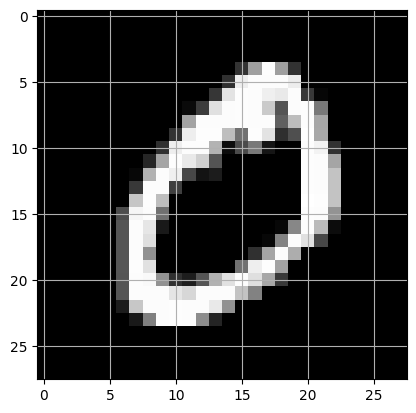

In [3]:
plt.figure()

plt.imshow(train_images[1,:,:], cmap="gray")

plt.grid("off")
plt.show()

In [4]:
train_images.shape

(60000, 28, 28)

Vemos que el dataset mnist tiene 60000 imágenes cuyo tamaño es de 28 x 28 pixeles.

In [5]:
clases = np.unique(train_labels)
print(clases)

[0 1 2 3 4 5 6 7 8 9]


Vemos que el dataset MNIST tiene 10 clases, las cuales son los números del cero al nueve.

# Limpieza de datos

Empiezo normalizando las imágenes a valores entre 0 y 1 tanto en el conjunto de entrenamiento como en el de validación.

In [6]:
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255
#es sobre 255 porque los pixeles que manejan las imagenes van de 0 - 255 pixeles

Ahora se organizará las imágenes para que pueda ser procesado por la red convolucional (CNN), se estará usando los pixeles en el que se viene trabajando y con un solo canal, esto sería para trabajarlo a una escala de grises.

In [7]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)  #1 es el canal de color, es escala de grises
# 28 x 28 las dimensiones de la imagen
test_images = test_images.reshape(test_images.shape[0],28,28,1) 

In [8]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10) 
test_labels = tf.keras.utils.to_categorical(test_labels, 10)
#con 10 posibles opciones
#to_categorical es para estandarizar los datos con base a las dimensiones que se tiene
# se quiere llevar a un arreglo de ceros y unos

# Creación Red Neuronal

In [9]:
#Añadir le modelo
model = tf.keras.Sequential()

#Anadir capas
model.add(Conv2D(filters=64, kernel_size=2, padding='same',activation='relu',input_shape=(28,28,1)))
# 64 filtros, kernel_size es el tamaño de la ventana que se va a mover por la imagen
# padding es para que no se pierda informacion en las esquinas y same es para que no se pierda informacion
#input_shape es la forma de la imagen
model.add(MaxPooling2D(pool_size=2)) #Reduce la dimension de la imagen a la mitad
model.add(Dropout(0.3)) #Reduce el overfitting en un 30%
# Después sigo apilando capas

model.add(Conv2D(filters=32, kernel_size=2, padding='same',activation='relu'))  # no especifico input_shape porque ya se sabe
# filters es el numero de filtros que se van a aplicar y esta vez es 32 porque ya se redujo la imagen a la mitad
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
# después de tantas capas de convolcuion se necesita aplanar la imagen

model.add(Flatten()) # se aplanan las imagenes para que se puedan meter a una red neuronal y queden en serie

#despues de planear la imagen se puede usar capaz densas
model.add(Dense(256, activation='relu')) # 256 neuronas en la capa densa
model.add(Dropout(0.5)) # se reduce el overfitting en un 50%
model.add(Dense(10, activation='softmax')) # 10 neuronas porque son 10 posibles opciones
model.summary()

c:\Users\Usuario\Documents\Universidad\Práctica\.venc\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 64)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       401,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

# Compilar modelo

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Definir Callback

In [11]:
CallBack = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5, restore_best_weights=True)]
# monitor es la metrica que se va a monitorear, mode es si se quiere maximizar o minimizar, verbose es para que se muestre en pantalla; 1 es para que se muestre cuando se detiene el entrenamiento
# patience es el numero de iteraciones que se va a esperar para detener el entrenamiento si no se nota mejoría, restore_best_weights es para que se quede con los mejores pesos

# Entrenar modelo

In [12]:
modelo = model.fit(train_images,
                   train_labels, 
                   batch_size=64, 
                   epochs=15, 
                   callbacks=CallBack, 
                   validation_data=(test_images, test_labels))
#batch_size es el numero de imagenes que se van a procesar en cada iteracion
#epochs es el numero de veces que se va a iterar sobre el conjunto de datos

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.8067 - loss: 0.6018 - val_accuracy: 0.9780 - val_loss: 0.0732
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9585 - loss: 0.1340 - val_accuracy: 0.9849 - val_loss: 0.0490
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9704 - loss: 0.0957 - val_accuracy: 0.9873 - val_loss: 0.0381
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 47ms/step - accuracy: 0.9759 - loss: 0.0760 - val_accuracy: 0.9886 - val_loss: 0.0341
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 38ms/step - accuracy: 0.9792 - loss: 0.0662 - val_accuracy: 0.9899 - val_loss: 0.0304
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.9811 - loss: 0.0609 - val_accuracy: 0.9896 - val_loss: 0.0299
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.9818 - loss: 0.0578 - val_accuracy: 0.9913 - val_loss: 0.0284
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9822 - loss: 0.0546 - 

# Visualización evolución de la pérdida y accuracy

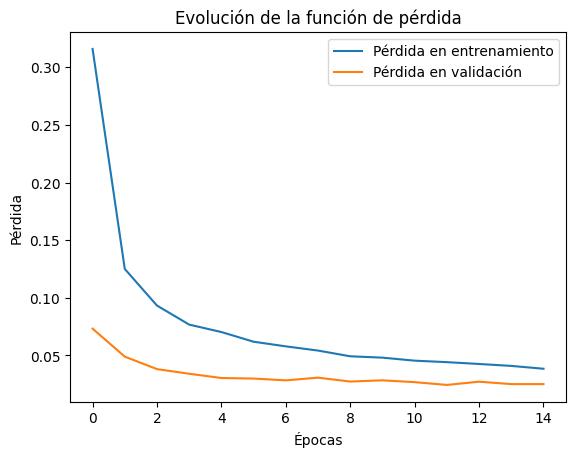

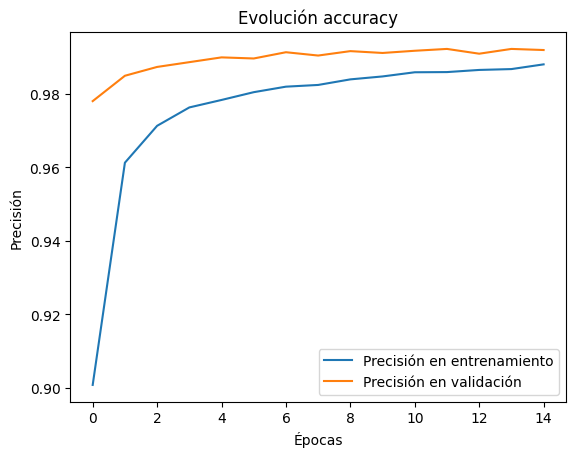

In [13]:
# Graficar la función de pérdida
plt.plot(modelo.history['loss'], label='Pérdida en entrenamiento')
plt.plot(modelo.history['val_loss'], label='Pérdida en validación')
plt.title('Evolución de la función de pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Graficar la precisión
plt.plot(modelo.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(modelo.history['val_accuracy'], label='Precisión en validación')
plt.title('Evolución accuracy')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()  

## Conclusión de la pérdida:
La pérdida tanto en el entrenamiento como en la validación disminuye rápidamente, lo que es una señal de que el modelo está aprendiendo correctamente.

No hay signos de sobreajuste (overfitting) evidente, ya que la pérdida en validación no empieza a aumentar después de unas cuantas épocas. Esto significa que el modelo no está memorizando los datos de entrenamiento, sino que está generalizando bien.

## Conclusión de la exactitud (accuracy):
La exactitud en ambos conjuntos es alta y se estabiliza en un valor superior al 97%, lo cual indica que el modelo está funcionando muy bien tanto en el conjunto de entrenamiento como en el conjunto de validación.

Al igual que en la gráfica de pérdida, no parece haber signos de sobreajuste significativo, ya que la precisión en el conjunto de validación es alta y constante.


ENTRENAMIENTO Y VALIDACIÓN:

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5923
           1       1.00      1.00      1.00      6742
           2       1.00      1.00      1.00      5958
           3       1.00      0.99      1.00      6131
           4       1.00      1.00      1.00      5842
           5       1.00      1.00      1.00      5421
           6       1.00      1.00      1.00      5918
           7       0.99      1.00      1.00      6265
           8       1.00      1.00      1.00      5851
           9       1.00      0.99      0.99      5949

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000


PRUEBA:

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
     

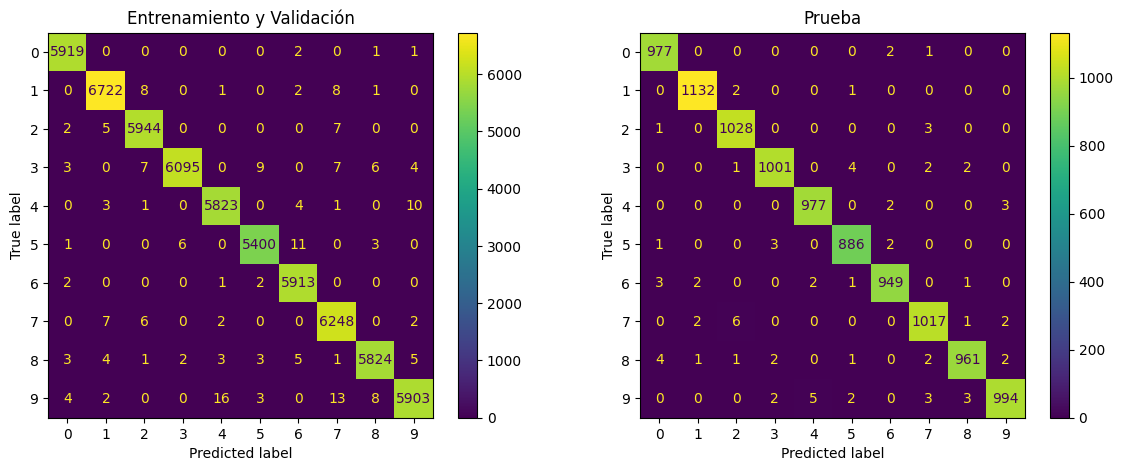

In [14]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Convertir las etiquetas one-hot back a enteros
train_labels_int = np.argmax(train_labels, axis=1)
test_labels_int = np.argmax(test_labels, axis=1)

# Crear las subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# ENTRENAMIENTO Y VALIDACION
print("\nENTRENAMIENTO Y VALIDACIÓN:\n")

# Obtener predicciones en el conjunto de entrenamiento
y_pred_train = np.argmax(model.predict(train_images), axis=1)

# Imprimir el reporte de clasificación para el conjunto de entrenamiento
print(classification_report(train_labels_int, y_pred_train))

# Mostrar la matriz de confusión para el conjunto de entrenamiento
ConfusionMatrixDisplay.from_predictions(
    y_true=train_labels_int,
    y_pred=y_pred_train,
    display_labels=clases,
    ax=ax1
)
ax1.set_title("Entrenamiento y Validación")

# PRUEBA
print("\nPRUEBA:\n")

# Obtener predicciones en el conjunto de prueba
y_pred_test = np.argmax(model.predict(test_images), axis=1)

# Imprimir el reporte de clasificación para el conjunto de prueba
print(classification_report(test_labels_int, y_pred_test))

# Mostrar la matriz de confusión para el conjunto de prueba
ConfusionMatrixDisplay.from_predictions(
    y_true=test_labels_int,
    y_pred=y_pred_test,
    display_labels=clases,
    ax=ax2
)
ax2.set_title("Prueba")

# Mostrar los gráficos
plt.show()

# Conclusión

- Vemos que el modelo tiene un desempeño excepcional con los datos de entrenamiento y validación.

- En la matrice de confusión de entrenamiento y validación vemos en general un buen desempeño, se observa por ejemplo que hubo algunos errores en la clase 9, 16 instancias se clasificaron erróneamente como clase 4 y 13 instancias como clase 7.
Clases como 0, 1, 2, y 6 tienen muy pocas predicciones incorrectas, lo que muestra que el modelo tiene un rendimiento muy alto para esas clases.

- En la matriz de confusión de prueba se observa en general manera muy bien el tema de las predicciones, siendo el valor más alto de errores 6, esto se evidencia en la clase 7 donde 6 instancias se clasificaron erróneamente como clase 2.